In [250]:
import pandas as pd
import numpy as np

In [251]:
mba_salary_pd = pd.read_csv("Module3Data/ML Using Python - files/MBA_Salary.csv")
mba_salary_pd.info()
mba_salary_pd.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [252]:
import statsmodels.api as sm

X = sm.add_constant(mba_salary_pd['Percentage in Grade 10'])
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [253]:
Y = mba_salary_pd['Salary']

In [254]:
import matplotlib.pyplot as plt
import seaborn as sn

<Axes: xlabel='Percentage in Grade 10', ylabel='Salary'>

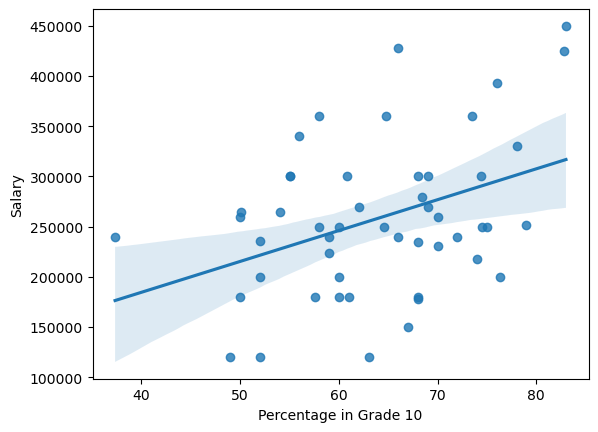

In [255]:
sn.regplot(mba_salary_pd,x=mba_salary_pd['Percentage in Grade 10'], y=mba_salary_pd['Salary'] )

In [256]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, train_size = 0.6,
                                                   random_state=100)
test_x

,const,Percentage in Grade 10
6,1.0,70.00
36,1.0,68.00
37,1.0,52.00
28,1.0,58.00
43,1.0,74.50
49,1.0,60.80
5,1.0,55.00
33,1.0,78.00
20,1.0,63.00
42,1.0,74.40


In [257]:
mba_salary_lm = sm.OLS(train_y, train_x).fit()

print(mba_salary_lm.params)

const                     19713.436086
Percentage in Grade 10     3765.113528
dtype: float64


# Model diagnostics to validate the performance of the model. In the following we are using R-square value
# to find the performance of the model 

In [259]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.206     
Dependent Variable:       Salary                AIC:                     761.7828  
Date:                     2024-06-23 22:22      BIC:                     764.5852  
No. Observations:         30                    Log-Likelihood:          -378.89   
Df Model:                 1                     F-statistic:             8.542     
Df Residuals:             28                    Prob (F-statistic):      0.00680   
R-squared:                0.234                 Scale:                   5.8549e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  19713.4361 84126.4719 0.2343 0.8164 -152611.8298 192038.7019
Percentage in Grade 10  3765.1135  1288.2810 2.9226 0.0068    1126.1895   6404.0376
-----------------------------------------------------------------------------------
Omnibus:                    2.269              Durbin-Watson:                 2.721
Prob(Omnibus):              0.322              Jarque-Bera (JB):              1.360
Skew:                       0.221              Prob(JB):                      0.507
Kurtosis:                   2.055              Condition No.:                 393  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [1]:
mba_salary_lm.resid

NameError: name 'mba_salary_lm' is not defined

<Figure size 800x600 with 0 Axes>

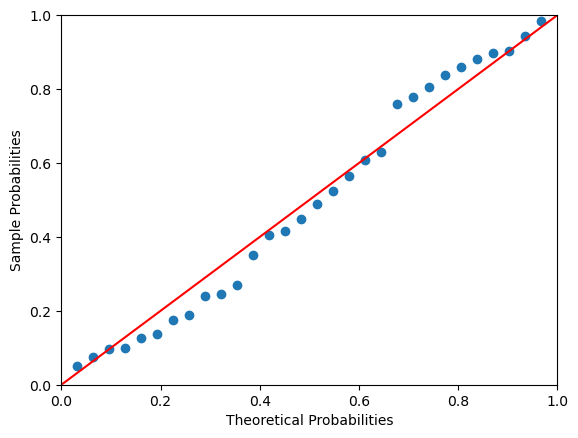

In [261]:
probplot = sm.ProbPlot(mba_salary_lm.resid, fit = True)
plt.figure( figsize = (8, 6))
probplot.ppplot(line = '45')
plt.show()


# Outlier Analysis
# Can be done using Z Score and Cooks Distance
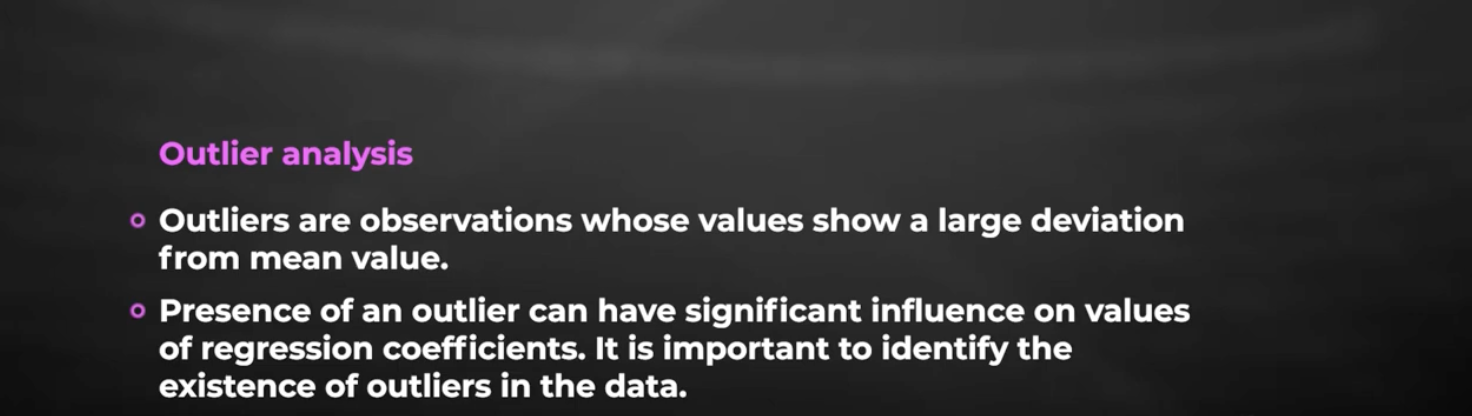



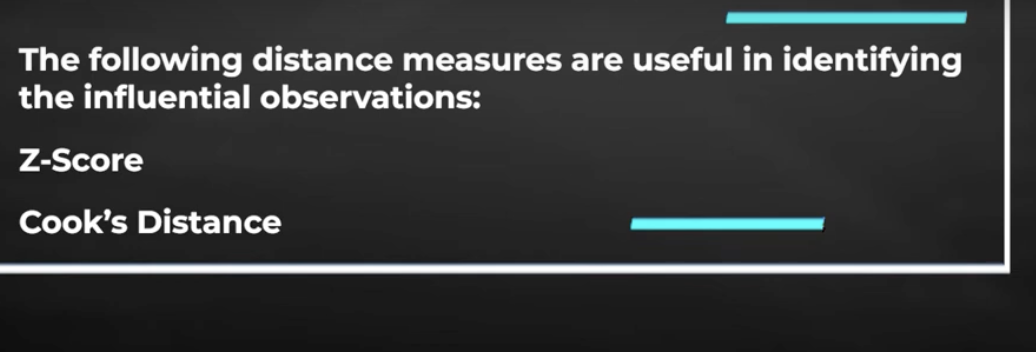
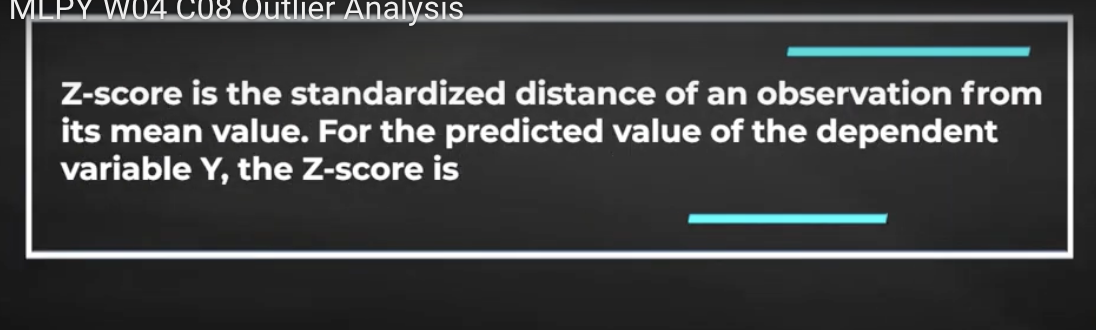
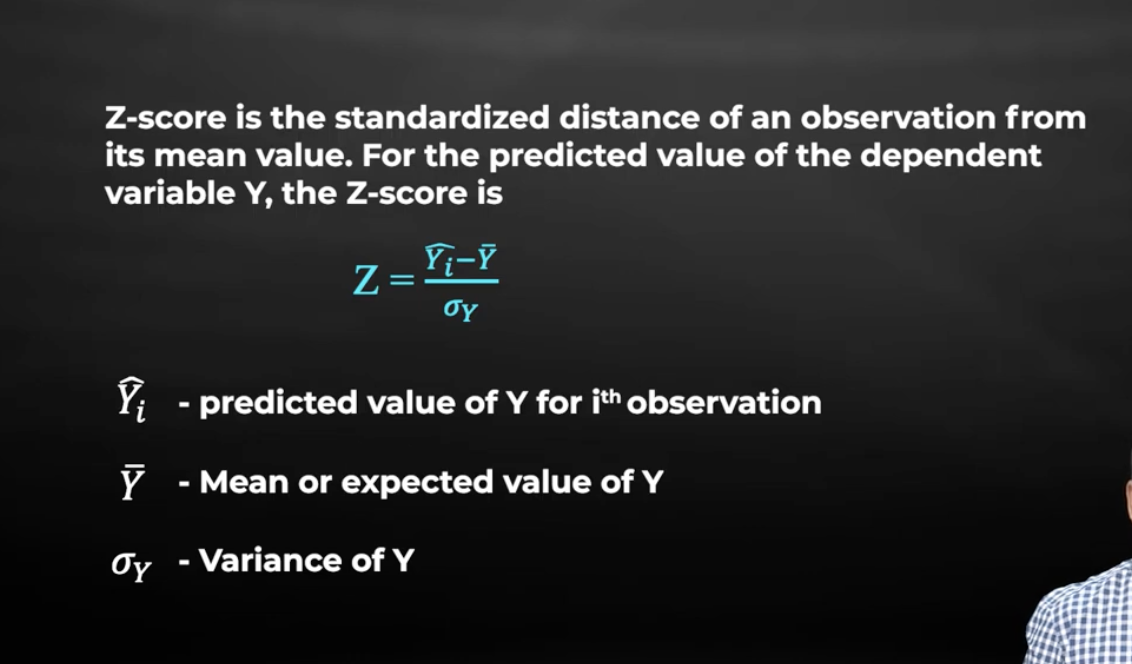

Any observation with Z Score greater than 3 will be flagged as an outlier

In [264]:
from scipy.stats import zscore
mba_salary_pd['z_score_salary'] =  zscore(mba_salary_pd['Salary'])
mba_salary_pd[ (mba_salary_pd.z_score_salary > 3.0) | (mba_salary_pd.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


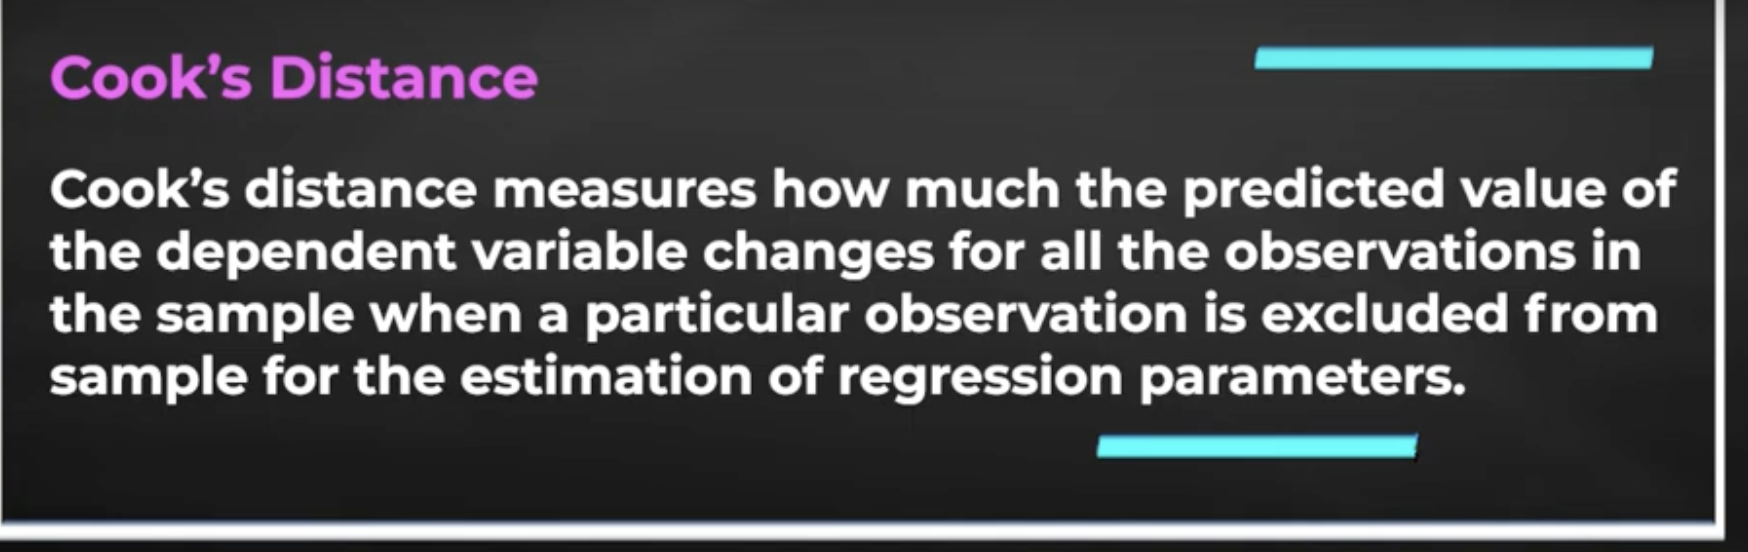
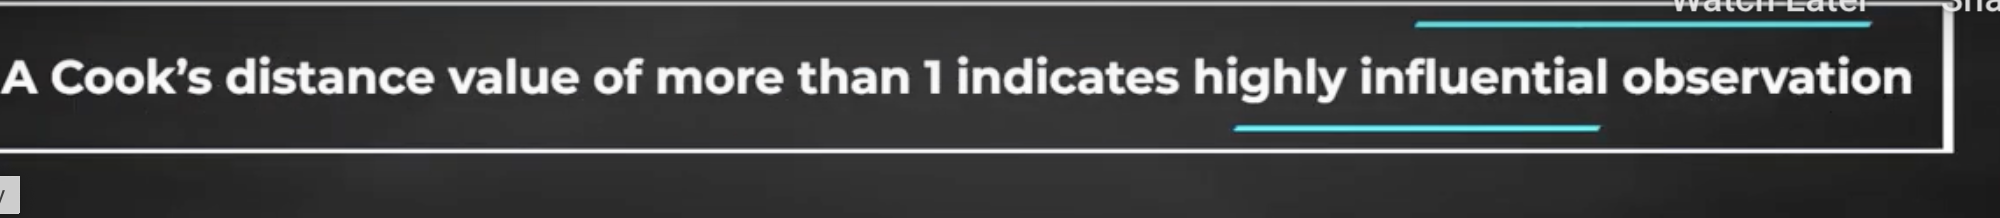
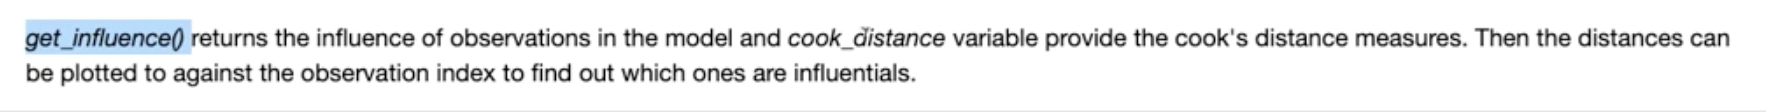

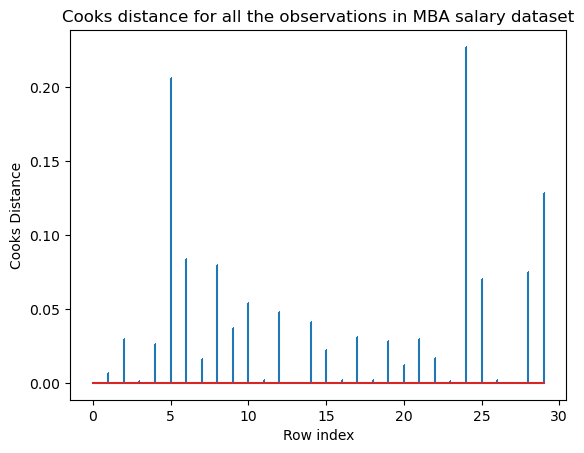

In [266]:
import numpy as np
mba_influence = mba_salary_lm.get_influence()
#print("........MBA_INFLUENCE........")
#mba_influence
#print("........MBA_INFLUENCE_COOKS_DISTANCE........")
(c,p) = mba_influence.cooks_distance
#mba_influence.cooks_distance
plt.stem(np.arange(len(train_x)), np.round(c,3),
        markerfmt=",");
plt.title("Cooks distance for all the observations in MBA salary dataset");
plt.xlabel("Row index")
plt.ylabel("Cooks Distance");

# Prediction

The prediction should be made on the validation (or test) data and the accuracy of the prediction should be evaluated. 

Several measures can be used for measuring the accuracy of prediction.

Mean Square Error (MSE),
Root Mean Square Error (RMSE) and
Mean Absolute Percentage Error (MAPE)
are some of the frequently used measures. sklearn.metrics has r2_score and mean_squared_error for measuring R-squared and MSE values. We need to take the square root of the MSE value to get RMSE value. Both the methods take predicted Y values and actual Y values to calculate the accuracy measures. Numpy module has sqrt method to calculate the square root of a value.

In [268]:
pred_y = mba_salary_lm.predict(test_x)
pred_y

6     283271.383027
36    275741.155972
37    215499.339528
28    238090.020695
43    300214.393902
49    248632.338572
5     226794.680111
33    313392.291249
20    256915.588333
42    299837.882549
0     253150.474806
11    245620.247750
18    283271.383027
45    236508.673013
38    223029.566584
25    262939.769978
26    207969.112473
35    230559.793639
17    277247.201383
7     275741.155972
dtype: float64

# Measuring Accuracy


# sklearn.metrics has r2_score and mean_squared_error for measuring r squared and MSE values

In [271]:
from sklearn.metrics import r2_score, mean_squared_error

np.abs(r2_score(test_y, pred_y))

0.11765817258230404

In [272]:
# So the model only explains 11.7 percent of variation in the validation set as above

In [273]:
# Checking the RMSE values
np.sqrt(mean_squared_error(test_y,pred_y))

63979.559632842625